## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

import pathlib
from matplotlib import pyplot as plt
import random
import math
import numpy

import seaborn as sns

from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers,models,initializers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Loading

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


We are loading the CIFAR-10 dataset using the Keras library. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes.

The dataset is divided into a training set and a test set. The training set contains 50,000 images, while the test set contains 10,000 images.

## Class Distribution

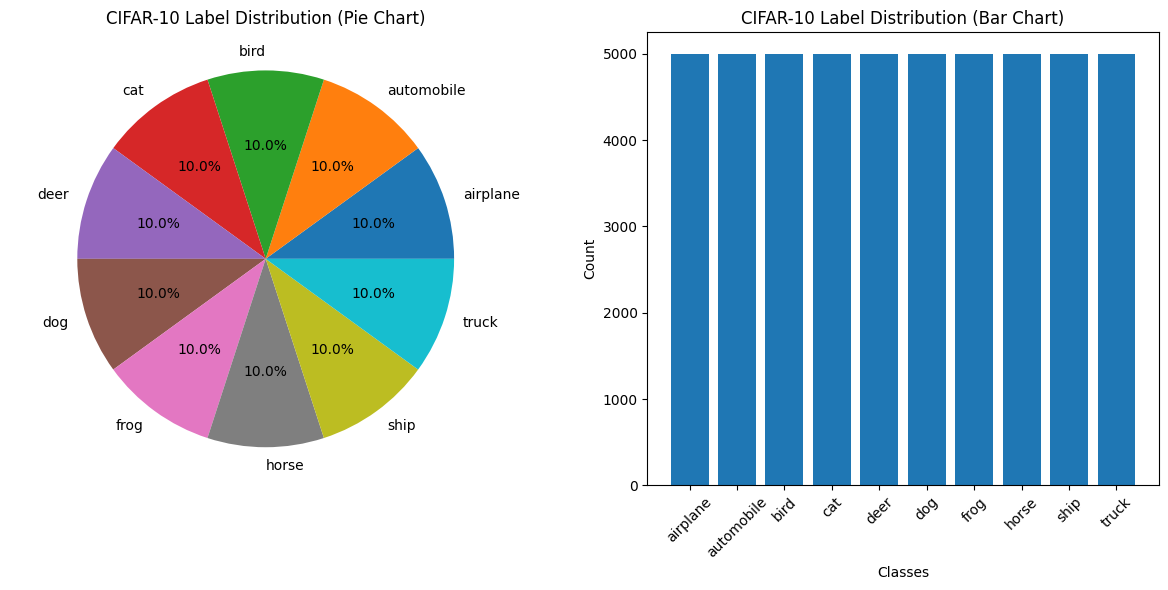

In [ ]:
# Count the occurrences of each label in y_train
label_counts = np.bincount(y_train.flatten())

# Get the class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Plotting the pie chart
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(label_counts, labels=class_names, autopct='%1.1f%%')
plt.title("CIFAR-10 Label Distribution (Pie Chart)")
plt.axis('equal')

# Bar chart
plt.subplot(1, 2, 2)
plt.bar(class_names, label_counts)
plt.title("CIFAR-10 Label Distribution (Bar Chart)")
plt.xlabel("Classes")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


From the charts we can see that the dataset is perfectly balanced.
In fact, in case of strong class imbalance there would be a bias in the training, as the network would be more trained to recognise the classes with more representation, leading to great performances on the training and test set.

## Visualization of a Sample of Images

Here we show a sample of images from the dataset.

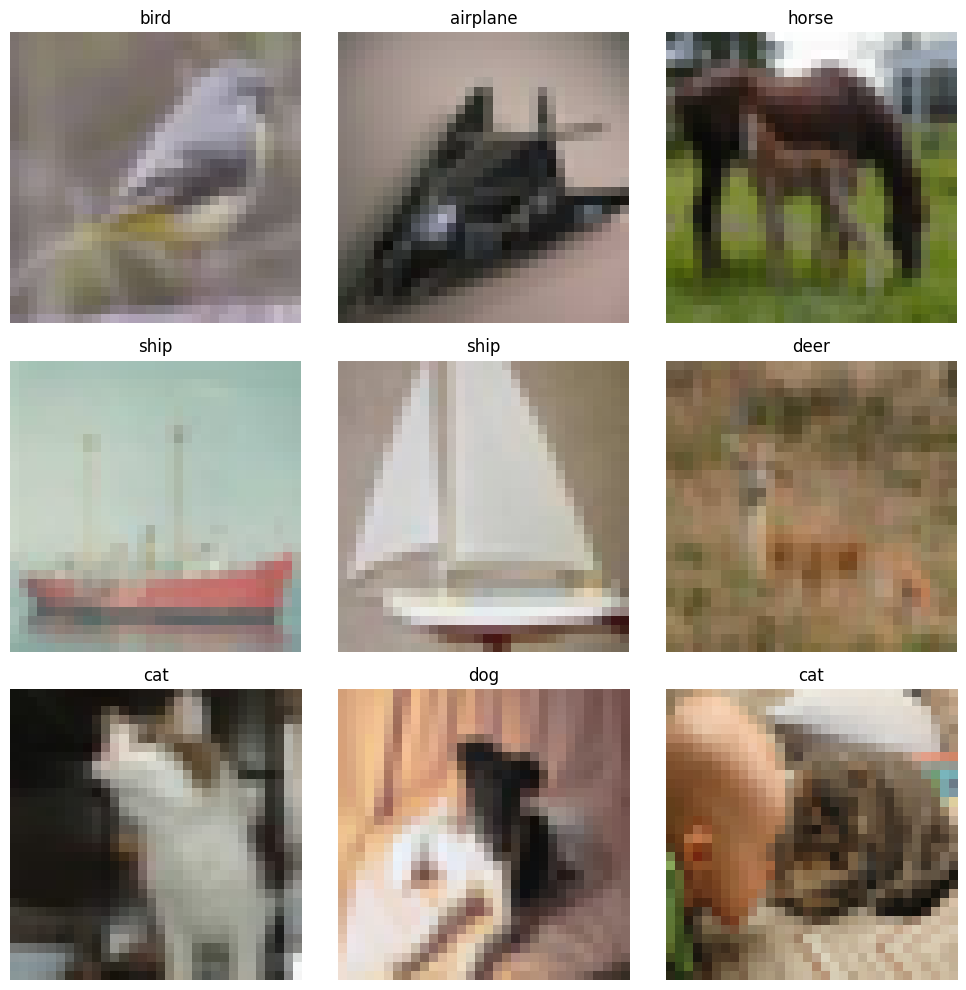

In [ ]:
# Select random images and their labels from the dataset
random_indices = np.random.choice(len(x_train), size=9, replace=False)
images = x_train[random_indices]
labels = y_train[random_indices].flatten()

# Create a 3 by 3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Iterate through the subplots and plot the images with their labels
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(images[i])
    ax.axis('off')

    # Set the label as the title of the subplot
    label = class_names[labels[i]]
    ax.set_title(label)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Creating the datasets

In [ ]:
# Encoding the labels as a categorical variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#Train Dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#Test Dataset
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
#Batching the datasets
train_ds = train_ds.batch(128)
test_ds = test_ds.batch(128)

In [ ]:
#Setting the number of outputs for the dense layer
num_classes=10

We define an early stopping which monitor the Validation Loss and stops the training if it doesn't reach lower values in 10 epochs. Also, we set the *restore_best_weights* option as True loading the best weights if the early stopping kicks in

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# **Model v1**

The first model is composed by:

- 3 **Convolutional** layers with 32, 64 and 128 filters of dimension 3x3
- 3 **Activation** layers using 'relu' function
- 2 **MaxPooling2D** layers with window size 3x3 and stride of 3
- 1 **GlobalMaxPooling2D** layer
- 1 **Dense** layer with activation function 'softmax'

In [ ]:
inputs = keras.Input((32, 32 ,3)) # Height, Widht, Channels of the image

x = inputs

x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

net1 = keras.Model(inputs, outputs)

For the compilation we used the **Adam** optimizer, which is an improvement of the RMSprop optimizer, with the standard learning rate of 0.001, the **Categorical Crossentropy** as the loss and the **Accuracy** as the metric.

In [ ]:
net1.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = net1.fit(train_ds,
          epochs=50,
          validation_data=test_ds,
          callbacks = [callback]
                  );

Epoch 1/50
391/391 [==============================] - 12s 7ms/step - loss: 3.2260 - accuracy: 0.3454 - val_loss: 1.5275 - val_accuracy: 0.4536
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4069 - accuracy: 0.4993 - val_loss: 1.3476 - val_accuracy: 0.5195
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2483 - accuracy: 0.5598 - val_loss: 1.3052 - val_accuracy: 0.5465
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.1354 - accuracy: 0.6002 - val_loss: 1.1885 - val_accuracy: 0.5867
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.0533 - accuracy: 0.6307 - val_loss: 1.1891 - val_accuracy: 0.5921
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9843 - accuracy: 0.6532 - val_loss: 1.2100 - val_accuracy: 0.5894
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9437 - accuracy: 0.6706 - val_loss: 1.1913 - val_accuracy: 0.5958
Epoch

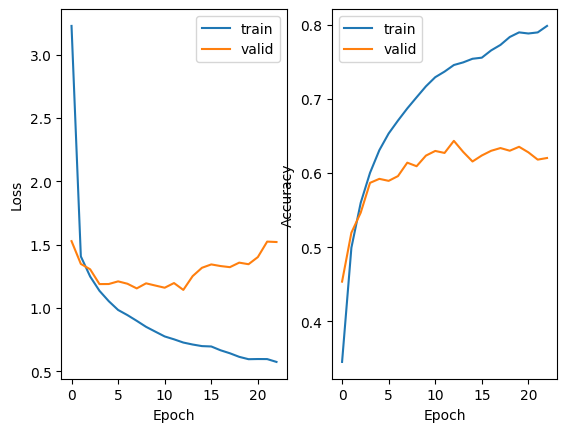

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid']);

From the graph we can see that this model presents a big overfitting and low values of accuracy in the validation set.

We proceed to show the structure of this model:

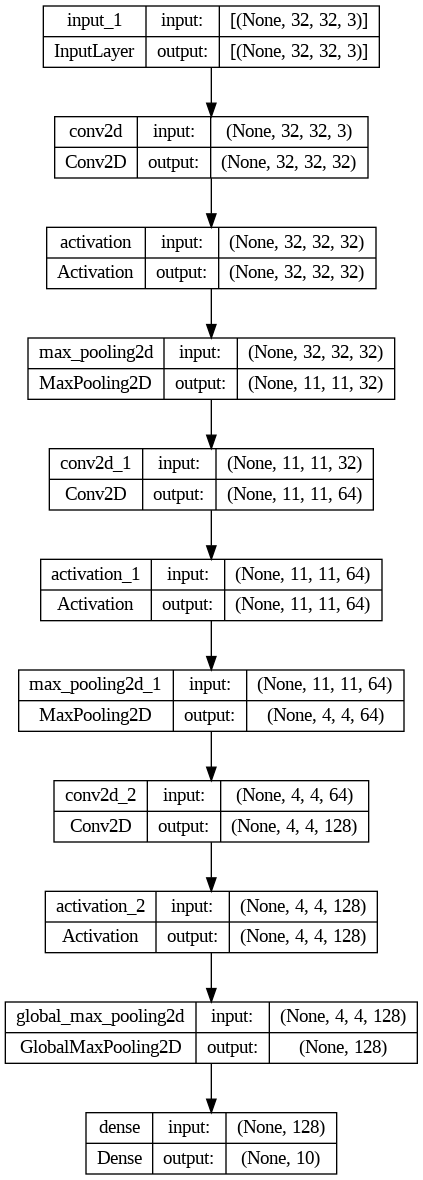

In [ ]:
plot_model(net1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Model V2**


We now improve the previous model by adding the following layers:

- **BatchNormalization**: applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
- **Dropout**: randomly sets input units to 0 with a preset frequency, which helps prevent overfitting. It activates only during training.
- **Flatten**: rimodels the tensor removing all the dimension but one.

In [ ]:
inputs = keras.Input((32,32,3))

x = inputs

x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(128, 3, padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)


x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Flatten()(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

net2 = keras.Model(inputs, outputs)

In [ ]:
net2.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = net2.fit(train_ds,
          epochs=50,
          validation_data=test_ds,
          callbacks = [callback]
                  );

Epoch 1/50
391/391 [==============================] - 7s 11ms/step - loss: 1.8124 - accuracy: 0.3477 - val_loss: 1.7025 - val_accuracy: 0.3576
Epoch 2/50
391/391 [==============================] - 4s 9ms/step - loss: 1.5015 - accuracy: 0.4593 - val_loss: 1.5736 - val_accuracy: 0.4234
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 1.3893 - accuracy: 0.5037 - val_loss: 1.3480 - val_accuracy: 0.5057
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 1.3133 - accuracy: 0.5318 - val_loss: 1.2718 - val_accuracy: 0.5285
Epoch 5/50
391/391 [==============================] - 3s 9ms/step - loss: 1.2568 - accuracy: 0.5562 - val_loss: 1.2951 - val_accuracy: 0.5325
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 1.2111 - accuracy: 0.5689 - val_loss: 1.2785 - val_accuracy: 0.5352
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 1.1754 - accuracy: 0.5806 - val_loss: 1.1997 - val_accuracy: 0.5759
Epo

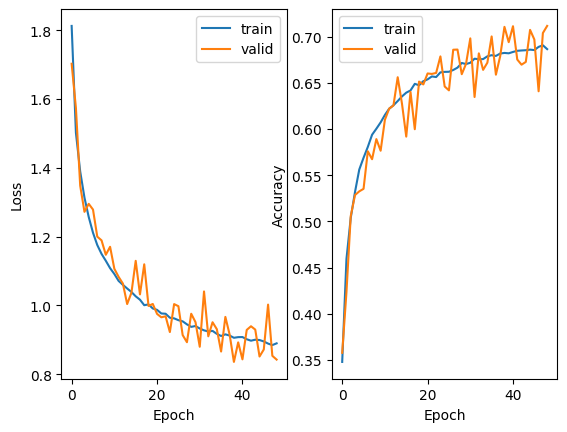

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid']);

From the graph we can see how the introduction of these layers has reduced the overfitting, as well as improved the accuracy in the validation set.

However, the accuracy is still low and we can make further improvements on the model.

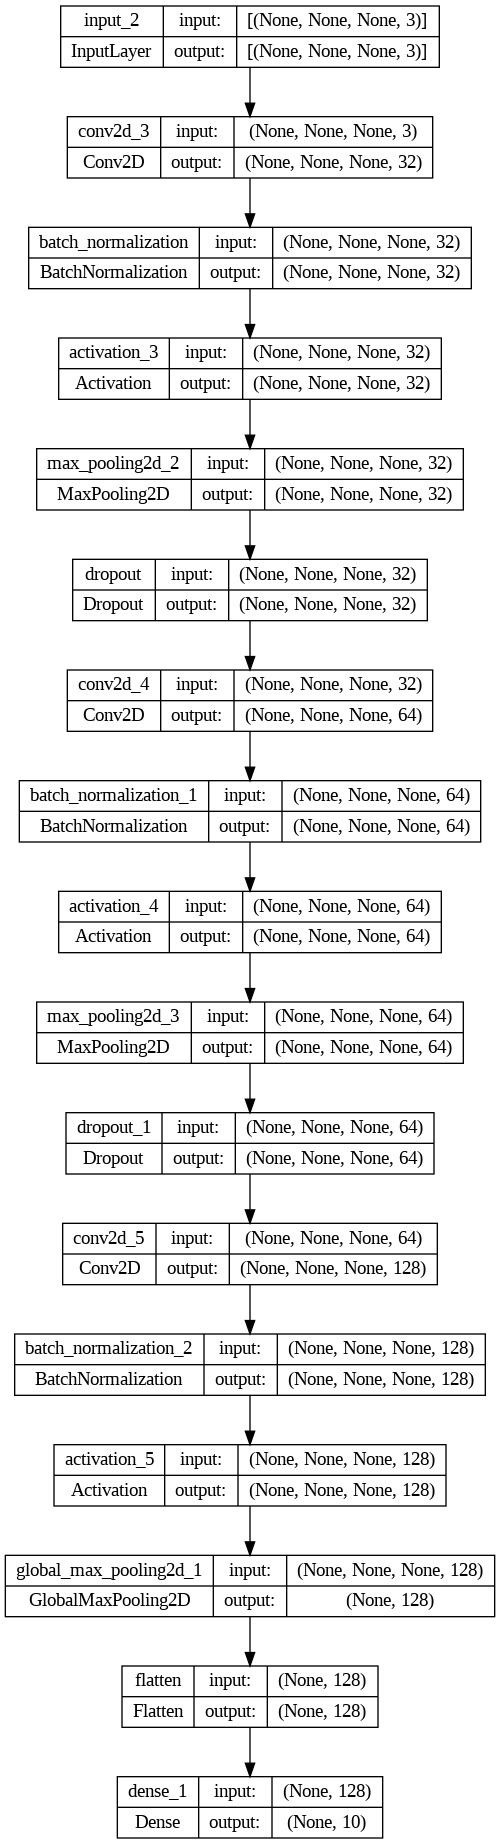

In [ ]:
plot_model(net2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Model V3**

In this architecture we have made the model denser, by adding 3 Convolutional layers with 32 filters and 3 Convolutional layers with 64 filters.

In [ ]:
def block(inputs, filters):
    x = keras.layers.Conv2D(filters, 3, padding="same")(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    return x


inputs = keras.Input((32,32,3))

x = inputs

for i in range(4):
    x = block(x, 32)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

for i in range(4):
    x = block(x, 64)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

x = block(x,128)

x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.Flatten()(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

net3 = keras.Model(inputs, outputs)

In [ ]:
net3.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = net3.fit(train_ds,
          epochs=50,
          validation_data=test_ds,
          callbacks = [callback]
                  );

Epoch 1/50
391/391 [==============================] - 20s 33ms/step - loss: 1.6900 - accuracy: 0.3860 - val_loss: 1.7159 - val_accuracy: 0.4042
Epoch 2/50
391/391 [==============================] - 12s 32ms/step - loss: 1.2253 - accuracy: 0.5544 - val_loss: 1.4782 - val_accuracy: 0.4788
Epoch 3/50
391/391 [==============================] - 12s 32ms/step - loss: 1.0461 - accuracy: 0.6259 - val_loss: 1.1221 - val_accuracy: 0.6026
Epoch 4/50
391/391 [==============================] - 13s 32ms/step - loss: 0.9423 - accuracy: 0.6632 - val_loss: 1.0348 - val_accuracy: 0.6379
Epoch 5/50
391/391 [==============================] - 12s 32ms/step - loss: 0.8633 - accuracy: 0.6933 - val_loss: 1.2249 - val_accuracy: 0.5998
Epoch 6/50
391/391 [==============================] - 12s 32ms/step - loss: 0.8020 - accuracy: 0.7162 - val_loss: 1.0606 - val_accuracy: 0.6418
Epoch 7/50
391/391 [==============================] - 13s 32ms/step - loss: 0.7515 - accuracy: 0.7343 - val_loss: 0.9104 - val_accuracy:

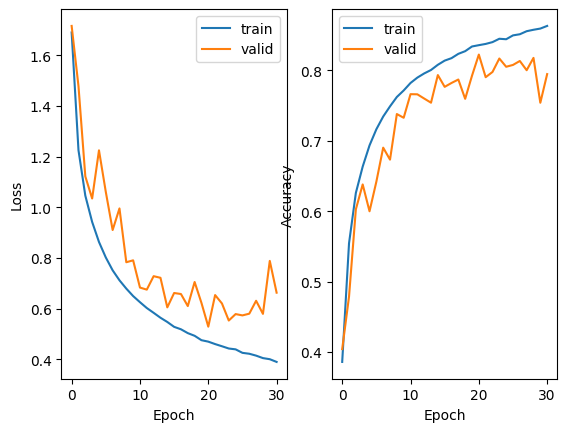

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid']);

As we can see, making the model denser have improved the accuracy, but at the cost of an increased overfitting, which will be addressed with the last improvement.

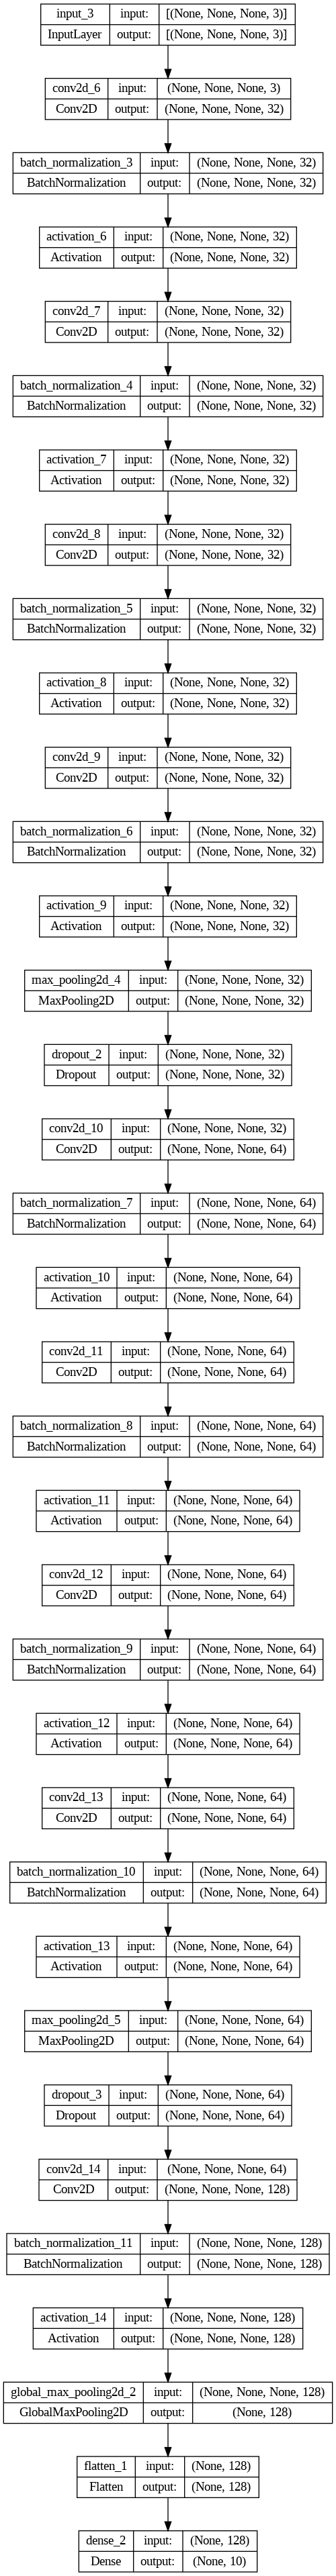

In [ ]:
plot_model(net3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Model V4**

In this architecture we have modified the activation function, replacing the '*relu*' with the '*Leaky ReLU*'.

Furthermore, we have identified the best Batch Size using the Grid Search method.

In [ ]:
def block(inputs, filters):
    x = keras.layers.Conv2D(filters, 3, padding="same")(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('LeakyReLU')(x)
    return x


inputs = keras.Input((32,32,3))

x = inputs

for i in range(4):
    x = block(x, 32)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

for i in range(4):
    x = block(x, 64)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

x = block(x,128)
x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.Flatten()(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

net4 = keras.Model(inputs, outputs)

After the definition of the model, we now use the **GridSearchCV** Algorithm

In [ ]:
def create_model():

    #definition of the model
    def block(inputs, filters):
      x = keras.layers.Conv2D(filters, 3, padding="same")(inputs)
      x = keras.layers.BatchNormalization()(x)
      x = keras.layers.Activation('LeakyReLU')(x)
      return x


    inputs = keras.Input((None, None ,3))

    x = inputs

    for i in range(4):
        x = block(x, 32)
    x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
    x = keras.layers.Dropout(0.5)(x)

    for i in range(4):
        x = block(x, 64)
    x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
    x = keras.layers.Dropout(0.5)(x)

    x = block(x,128)
    x = keras.layers.GlobalMaxPooling2D()(x)
    x = keras.layers.Flatten()(x)


    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)


    model = keras.Model(inputs, outputs)

    # compilation of the model
    model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

    return model

In [ ]:
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, verbose=1)

# We define the ensemble of batch sizes to choose from

batch_size = [32,64,128,256]

param_grid = dict(batch_size=batch_size)

grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1042/1042 [==============================] - 18s 12ms/step - loss: 1.6236 - accuracy: 0.4111
Epoch 2/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.2586 - accuracy: 0.5489
Epoch 3/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.1088 - accuracy: 0.6054
Epoch 4/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.0201 - accuracy: 0.6415
Epoch 5/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.9543 - accuracy: 0.6625
Epoch 6/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8931 - accuracy: 0.6858
Epoch 7/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8558 - accuracy: 0.6972
Epoch 8/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8115 - accuracy: 0.7149
Epoch 9/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.7892 - accuracy: 0.7240
Epoch 10/10
521/521 [==============================] - 2s 3ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1042/1042 [==============================] - 18s 12ms/step - loss: 1.6226 - accuracy: 0.4094
Epoch 2/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.2440 - accuracy: 0.5557
Epoch 3/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.0916 - accuracy: 0.6117
Epoch 4/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.0060 - accuracy: 0.6429
Epoch 5/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.9418 - accuracy: 0.6659
Epoch 6/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8804 - accuracy: 0.6899
Epoch 7/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8431 - accuracy: 0.7036
Epoch 8/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8059 - accuracy: 0.7157
Epoch 9/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.7769 - accuracy: 0.7277
Epoch 10/10
521/521 [==============================] - 2s 3ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1042/1042 [==============================] - 18s 12ms/step - loss: 1.6160 - accuracy: 0.4084
Epoch 2/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.2318 - accuracy: 0.5627
Epoch 3/10
1042/1042 [==============================] - 12s 12ms/step - loss: 1.0995 - accuracy: 0.6123
Epoch 4/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.9930 - accuracy: 0.6483
Epoch 5/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.9300 - accuracy: 0.6738
Epoch 6/10
1042/1042 [==============================] - 12s 11ms/step - loss: 0.8731 - accuracy: 0.6941
Epoch 7/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.8372 - accuracy: 0.7082
Epoch 8/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.7962 - accuracy: 0.7212
Epoch 9/10
1042/1042 [==============================] - 12s 12ms/step - loss: 0.7681 - accuracy: 0.7307
Epoch 10/10
521/521 [==============================] - 2s 3ms/st

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
521/521 [==============================] - 15s 17ms/step - loss: 1.6486 - accuracy: 0.4009
Epoch 2/10
521/521 [==============================] - 9s 17ms/step - loss: 1.2686 - accuracy: 0.5432
Epoch 3/10
521/521 [==============================] - 9s 17ms/step - loss: 1.1231 - accuracy: 0.5996
Epoch 4/10
521/521 [==============================] - 9s 17ms/step - loss: 1.0292 - accuracy: 0.6340
Epoch 5/10
521/521 [==============================] - 9s 17ms/step - loss: 0.9626 - accuracy: 0.6562
Epoch 6/10
521/521 [==============================] - 9s 17ms/step - loss: 0.9017 - accuracy: 0.6803
Epoch 7/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8671 - accuracy: 0.6922
Epoch 8/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8111 - accuracy: 0.7137
Epoch 9/10
521/521 [==============================] - 9s 17ms/step - loss: 0.7930 - accuracy: 0.7213
Epoch 10/10
261/261 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
521/521 [==============================] - 16s 17ms/step - loss: 1.6261 - accuracy: 0.4109
Epoch 2/10
521/521 [==============================] - 9s 17ms/step - loss: 1.2403 - accuracy: 0.5555
Epoch 3/10
521/521 [==============================] - 9s 17ms/step - loss: 1.1078 - accuracy: 0.6047
Epoch 4/10
521/521 [==============================] - 9s 17ms/step - loss: 1.0263 - accuracy: 0.6376
Epoch 5/10
521/521 [==============================] - 9s 17ms/step - loss: 0.9576 - accuracy: 0.6617
Epoch 6/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8998 - accuracy: 0.6831
Epoch 7/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8561 - accuracy: 0.6981
Epoch 8/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8195 - accuracy: 0.7122
Epoch 9/10
521/521 [==============================] - 9s 17ms/step - loss: 0.7809 - accuracy: 0.7261
Epoch 10/10
261/261 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
521/521 [==============================] - 16s 17ms/step - loss: 1.6506 - accuracy: 0.4002
Epoch 2/10
521/521 [==============================] - 9s 17ms/step - loss: 1.2782 - accuracy: 0.5350
Epoch 3/10
521/521 [==============================] - 9s 17ms/step - loss: 1.1176 - accuracy: 0.6029
Epoch 4/10
521/521 [==============================] - 9s 17ms/step - loss: 1.0182 - accuracy: 0.6414
Epoch 5/10
521/521 [==============================] - 9s 17ms/step - loss: 0.9494 - accuracy: 0.6647
Epoch 6/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8993 - accuracy: 0.6844
Epoch 7/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8486 - accuracy: 0.7008
Epoch 8/10
521/521 [==============================] - 9s 17ms/step - loss: 0.8104 - accuracy: 0.7152
Epoch 9/10
521/521 [==============================] - 9s 17ms/step - loss: 0.7763 - accuracy: 0.7281
Epoch 10/10
261/261 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
261/261 [==============================] - 15s 31ms/step - loss: 1.7414 - accuracy: 0.3744
Epoch 2/10
261/261 [==============================] - 8s 30ms/step - loss: 1.3262 - accuracy: 0.5188
Epoch 3/10
261/261 [==============================] - 8s 30ms/step - loss: 1.1667 - accuracy: 0.5797
Epoch 4/10
261/261 [==============================] - 8s 31ms/step - loss: 1.0655 - accuracy: 0.6195
Epoch 5/10
261/261 [==============================] - 8s 30ms/step - loss: 0.9995 - accuracy: 0.6422
Epoch 6/10
261/261 [==============================] - 8s 31ms/step - loss: 0.9298 - accuracy: 0.6678
Epoch 7/10
261/261 [==============================] - 8s 31ms/step - loss: 0.8797 - accuracy: 0.6882
Epoch 8/10
261/261 [==============================] - 8s 30ms/step - loss: 0.8426 - accuracy: 0.7011
Epoch 9/10
261/261 [==============================] - 8s 31ms/step - loss: 0.8034 - accuracy: 0.7165
Epoch 10/10
131/131 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
261/261 [==============================] - 14s 31ms/step - loss: 1.6995 - accuracy: 0.3730
Epoch 2/10
261/261 [==============================] - 8s 30ms/step - loss: 1.3264 - accuracy: 0.5183
Epoch 3/10
261/261 [==============================] - 8s 31ms/step - loss: 1.1520 - accuracy: 0.5852
Epoch 4/10
261/261 [==============================] - 8s 31ms/step - loss: 1.0623 - accuracy: 0.6215
Epoch 5/10
261/261 [==============================] - 8s 30ms/step - loss: 0.9884 - accuracy: 0.6497
Epoch 6/10
261/261 [==============================] - 8s 31ms/step - loss: 0.9246 - accuracy: 0.6724
Epoch 7/10
261/261 [==============================] - 8s 31ms/step - loss: 0.8826 - accuracy: 0.6860
Epoch 8/10
261/261 [==============================] - 8s 30ms/step - loss: 0.8422 - accuracy: 0.7024
Epoch 9/10
261/261 [==============================] - 8s 31ms/step - loss: 0.8070 - accuracy: 0.7125
Epoch 10/10
131/131 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
261/261 [==============================] - 15s 31ms/step - loss: 1.7240 - accuracy: 0.3737
Epoch 2/10
261/261 [==============================] - 8s 31ms/step - loss: 1.3214 - accuracy: 0.5195
Epoch 3/10
261/261 [==============================] - 8s 31ms/step - loss: 1.1589 - accuracy: 0.5856
Epoch 4/10
261/261 [==============================] - 8s 30ms/step - loss: 1.0623 - accuracy: 0.6194
Epoch 5/10
261/261 [==============================] - 8s 31ms/step - loss: 0.9929 - accuracy: 0.6454
Epoch 6/10
261/261 [==============================] - 8s 31ms/step - loss: 0.9359 - accuracy: 0.6699
Epoch 7/10
261/261 [==============================] - 8s 30ms/step - loss: 0.8876 - accuracy: 0.6849
Epoch 8/10
261/261 [==============================] - 8s 31ms/step - loss: 0.8504 - accuracy: 0.6984
Epoch 9/10
261/261 [==============================] - 8s 31ms/step - loss: 0.8033 - accuracy: 0.7135
Epoch 10/10
131/131 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
131/131 [==============================] - 14s 57ms/step - loss: 1.8562 - accuracy: 0.3426
Epoch 2/10
131/131 [==============================] - 7s 57ms/step - loss: 1.4062 - accuracy: 0.4852
Epoch 3/10
131/131 [==============================] - 7s 57ms/step - loss: 1.2282 - accuracy: 0.5568
Epoch 4/10
131/131 [==============================] - 7s 57ms/step - loss: 1.1319 - accuracy: 0.5910
Epoch 5/10
131/131 [==============================] - 7s 57ms/step - loss: 1.0581 - accuracy: 0.6212
Epoch 6/10
131/131 [==============================] - 7s 57ms/step - loss: 0.9937 - accuracy: 0.6468
Epoch 7/10
131/131 [==============================] - 8s 58ms/step - loss: 0.9457 - accuracy: 0.6644
Epoch 8/10
131/131 [==============================] - 8s 57ms/step - loss: 0.8993 - accuracy: 0.6811
Epoch 9/10
131/131 [==============================] - 7s 57ms/step - loss: 0.8656 - accuracy: 0.6945
Epoch 10/10
66/66 [==============================] - 1s 11ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
131/131 [==============================] - 15s 59ms/step - loss: 1.7829 - accuracy: 0.3541
Epoch 2/10
131/131 [==============================] - 8s 58ms/step - loss: 1.3927 - accuracy: 0.4931
Epoch 3/10
131/131 [==============================] - 8s 57ms/step - loss: 1.2354 - accuracy: 0.5540
Epoch 4/10
131/131 [==============================] - 8s 57ms/step - loss: 1.1336 - accuracy: 0.5948
Epoch 5/10
131/131 [==============================] - 8s 57ms/step - loss: 1.0676 - accuracy: 0.6183
Epoch 6/10
131/131 [==============================] - 8s 58ms/step - loss: 1.0095 - accuracy: 0.6389
Epoch 7/10
131/131 [==============================] - 8s 58ms/step - loss: 0.9575 - accuracy: 0.6546
Epoch 8/10
131/131 [==============================] - 8s 58ms/step - loss: 0.9116 - accuracy: 0.6725
Epoch 9/10
131/131 [==============================] - 8s 58ms/step - loss: 0.8742 - accuracy: 0.6890
Epoch 10/10
66/66 [==============================] - 1s 12ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
131/131 [==============================] - 14s 59ms/step - loss: 1.7986 - accuracy: 0.3513
Epoch 2/10
131/131 [==============================] - 8s 59ms/step - loss: 1.4129 - accuracy: 0.4842
Epoch 3/10
131/131 [==============================] - 8s 58ms/step - loss: 1.2317 - accuracy: 0.5556
Epoch 4/10
131/131 [==============================] - 8s 58ms/step - loss: 1.1170 - accuracy: 0.6000
Epoch 5/10
131/131 [==============================] - 8s 58ms/step - loss: 1.0395 - accuracy: 0.6276
Epoch 6/10
131/131 [==============================] - 8s 58ms/step - loss: 0.9758 - accuracy: 0.6527
Epoch 7/10
131/131 [==============================] - 8s 58ms/step - loss: 0.9252 - accuracy: 0.6693
Epoch 8/10
131/131 [==============================] - 8s 58ms/step - loss: 0.8826 - accuracy: 0.6843
Epoch 9/10
131/131 [==============================] - 8s 58ms/step - loss: 0.8482 - accuracy: 0.6973
Epoch 10/10
66/66 [==============================] - 1s 12ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1563/1563 [==============================] - 26s 12ms/step - loss: 1.5295 - accuracy: 0.4462
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1550 - accuracy: 0.5873
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0175 - accuracy: 0.6402
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9228 - accuracy: 0.6740
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8605 - accuracy: 0.6984
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8084 - accuracy: 0.7187
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7683 - accuracy: 0.7316
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7336 - accuracy: 0.7424
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7135 - accuracy: 0.7511
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [ ]:
print(f'Best Accuracy using {grid_result.best_params_}')

Best Accuracy using {'batch_size': 32}


We will use Batch Size = 32

In [ ]:
train_ds = train_ds.unbatch()
test_ds = test_ds.unbatch()
train_ds = train_ds.batch(32)
test_ds = test_ds.batch(32)

In [ ]:
def block(inputs, filters):
    x = keras.layers.Conv2D(filters, 3, padding="same")(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('LeakyReLU')(x)
    return x


inputs = keras.Input((32,32,3))

x = inputs

for i in range(4):
    x = block(x, 32)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

for i in range(4):
    x = block(x, 64)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

x = block(x,128)
x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.Flatten()(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

net4 = keras.Model(inputs, outputs)

In [ ]:
net4.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = net4.fit(train_ds,
          epochs=50,
          validation_data=test_ds,
          callbacks = [callback]
                  );

Epoch 1/50
1563/1563 [==============================] - 27s 13ms/step - loss: 1.5101 - accuracy: 0.4479 - val_loss: 1.2453 - val_accuracy: 0.5622
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1437 - accuracy: 0.5931 - val_loss: 1.1147 - val_accuracy: 0.6093
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9958 - accuracy: 0.6511 - val_loss: 0.8955 - val_accuracy: 0.6864
Epoch 4/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9097 - accuracy: 0.6801 - val_loss: 0.8175 - val_accuracy: 0.7169
Epoch 5/50
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8417 - accuracy: 0.7069 - val_loss: 0.7889 - val_accuracy: 0.7242
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7940 - accuracy: 0.7228 - val_loss: 0.6860 - val_accuracy: 0.7600
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7581 - accuracy: 0.7326 - val_loss: 0.6822 -

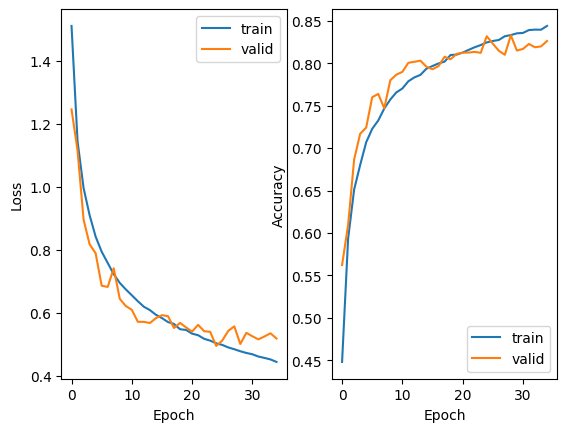

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid']);

In [ ]:
# Saving the model
net4.save('/content/drive/MyDrive/model.h5')

In [ ]:
net4 = keras.saving.load_model('/content/drive/MyDrive/model.h5')

# Predictions

Here we show some predictions made by our best model.

In [ ]:
predictions = np.array([])
labels =  np.array([])

for x, y in test_ds:

  predictions = np.concatenate([predictions, np.argmax(net4.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])


1/1 [==============================] - 0s 70ms/step


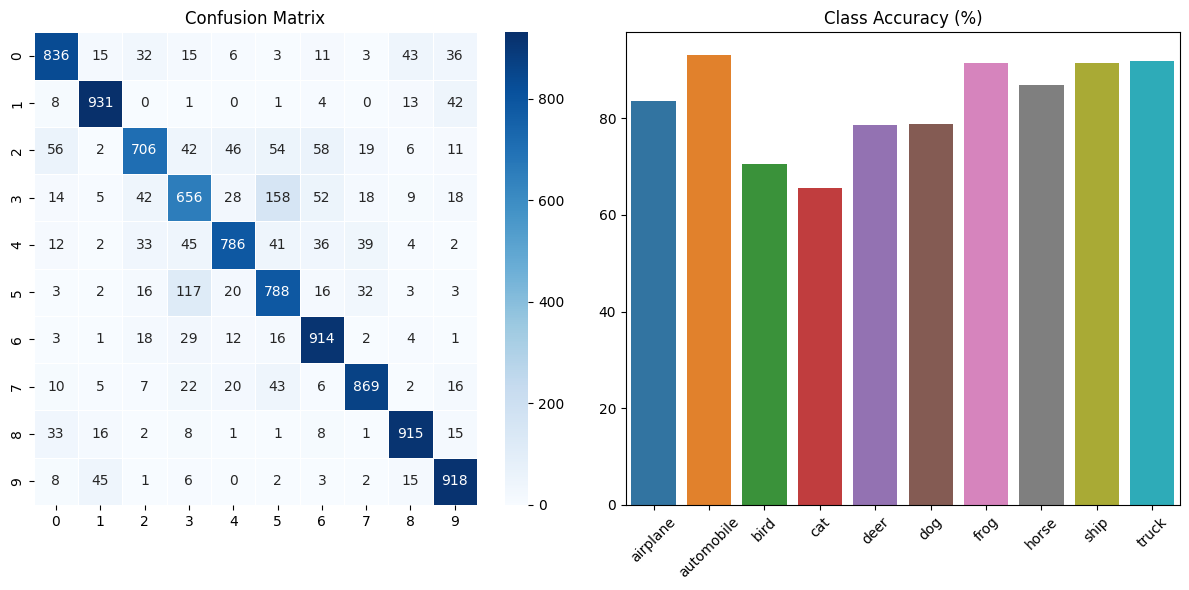

In [ ]:
#Compute the confusion matrix
mat = confusion_matrix(labels, predictions)

# Compute accuracy per class
class_accuracy = []
for i in range(mat.shape[0]):
    total = np.sum(mat[i])
    correct = mat[i, i]
    accuracy = 100 * correct / total
    class_accuracy.append(accuracy)

# Plot the grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix heatmap
sns.heatmap(mat, annot=True, fmt='.0f', linewidths=0.5, cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix")

# Plot class accuracy
sns.barplot(x=classes, y=class_accuracy, ax=axes[1])
axes[1].set_title("Class Accuracy (%)")
axes[1].set_xticklabels(classes, rotation=45)

plt.tight_layout()
plt.show()

As we can see the model struggles the most when trying to classify cats and birds, while it has the best performance on trucks.

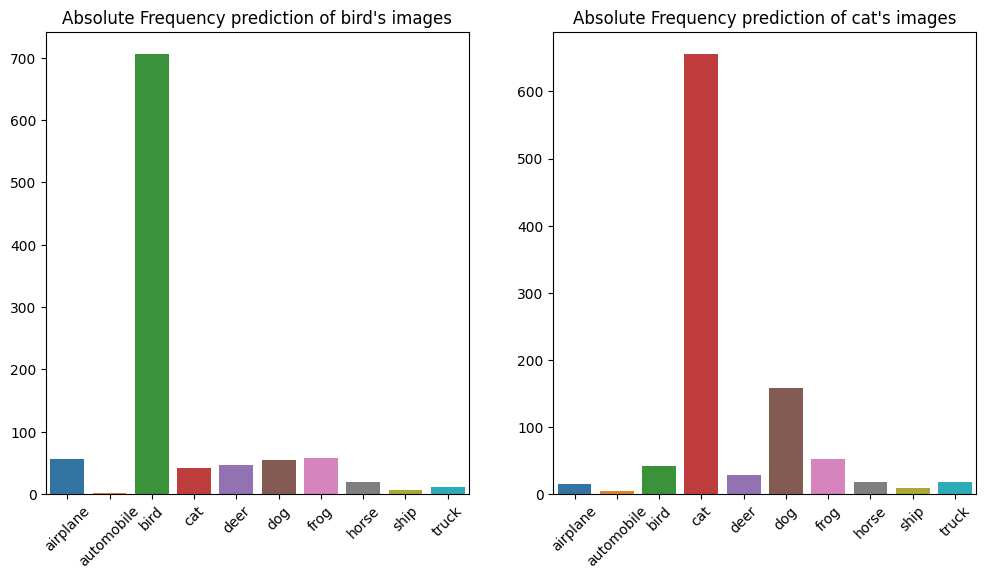

In [ ]:
# Plot the grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Bird
sns.barplot(x = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"], y = mat[2], ax=axes[0])
axes[0].set_title(f"Absolute Frequency prediction of {classes[2]}'s images")
axes[0].set_xticklabels(classes, rotation=45)


#Cats
sns.barplot(x = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"], y = mat[3], ax=axes[1])
axes[1].set_title(f"Absolute Frequency prediction of {classes[3]}'s images")
axes[1].set_xticklabels(classes, rotation=45)

plt.show()

Inspecting the predictions on birds and cats images, we can see that the model tends to mistake those with other animals.

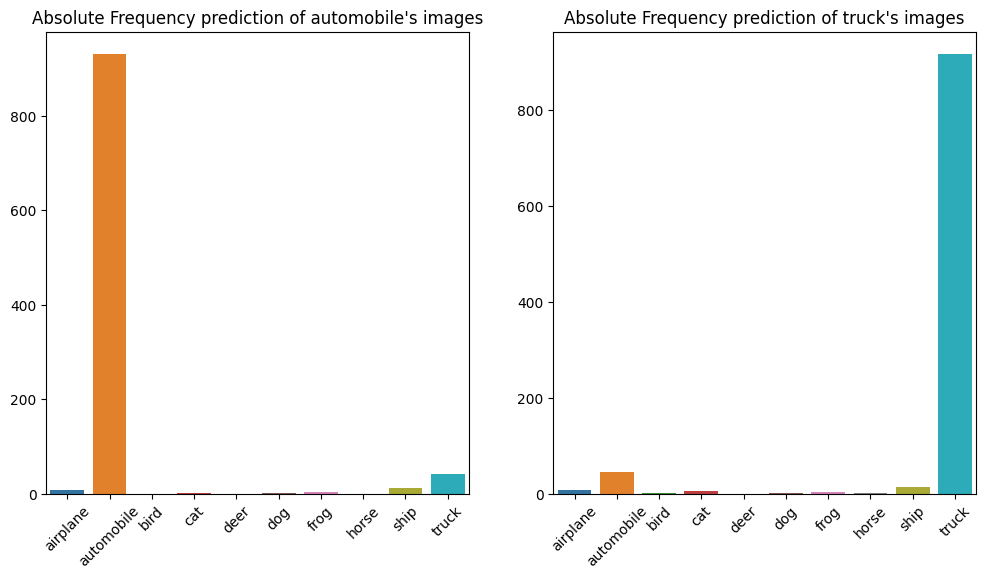

In [ ]:
# Plot the grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Bird
sns.barplot(x = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"], y = mat[1], ax=axes[0])
axes[0].set_title(f"Absolute Frequency prediction of {classes[1]}'s images")
axes[0].set_xticklabels(classes, rotation=45)


#Cats
sns.barplot(x = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"], y = mat[9], ax=axes[1])
axes[1].set_title(f"Absolute Frequency prediction of {classes[9]}'s images")
axes[1].set_xticklabels(classes, rotation=45)

plt.show()

1/1 [==============================] - 0s 25ms/step


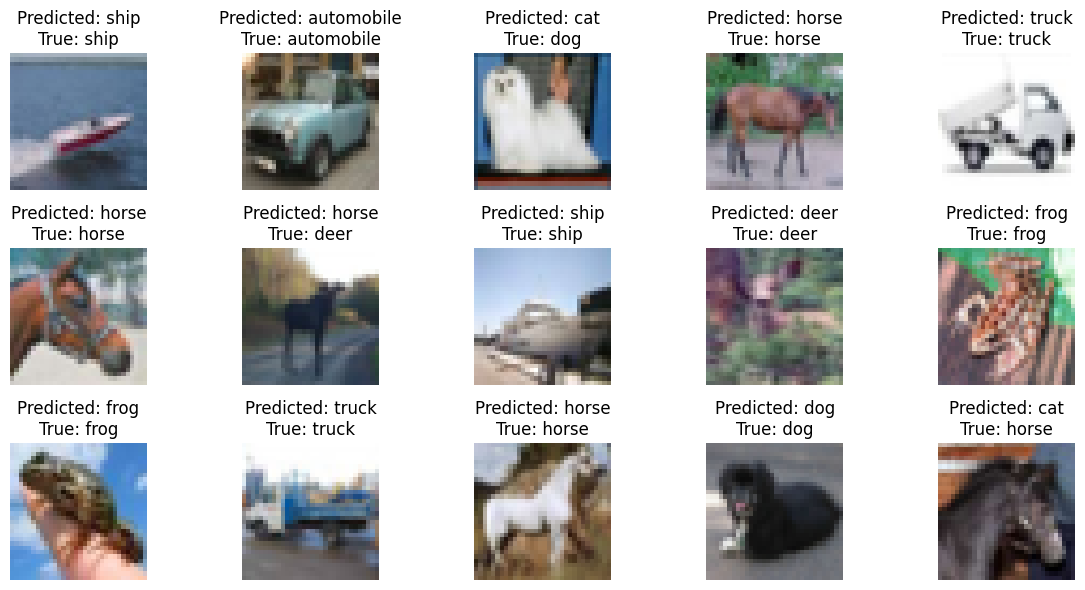

In [ ]:
category_dict = {
    tuple(np.array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=np.float32)): "deer",
    tuple(np.array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=np.float32)): "airplane",
    tuple(np.array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=np.float32)): "automobile",
    tuple(np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=np.float32)): "bird",
    tuple(np.array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=np.float32)): "cat",
    tuple(np.array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=np.float32)): "dog",
    tuple(np.array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=np.float32)): "frog",
    tuple(np.array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=np.float32)): "horse",
    tuple(np.array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=np.float32)): "ship",
    tuple(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=np.float32)): "truck"
}

num_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# Define the grid dimensions
rows = 3
cols = 5

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Iterate over the grid and plot the images
for r in range(rows):
    for c in range(cols):
        # Compute the index of the image in the dataset
        index = random.randint(0,990) + r * cols + c

        # Plot the image on the corresponding axis
        axes[r, c].imshow(x_test[index])
        axes[r, c].axis("off")

        # Add a title with the predicted and true labels
        pred_label = num_dict[np.argmax(net4.predict(x_test[index].reshape(1, 32, 32, 3)))]
        true_label = category_dict[tuple(y_test[index])]
        axes[r, c].set_title(f"Predicted: {pred_label}\nTrue: {true_label}")

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the grid of images
plt.show()

Now we get an image for every class from google and we test our model

In [ ]:
urls = [
    "https://www.pensketruckrental.com/media-library/penske-heavy-duty-truck-driving-over-bridge.jpg?id=31291376&width=1245&height=700&quality=85&coordinates=370%2C579%2C1103%2C520",
    "https://images.all-free-download.com/images/graphiclarge/ship_183625.jpg",
    "https://hips.hearstapps.com/hmg-prod/images/2023-mclaren-artura-101-1655218102.jpg?crop=1.00xw:0.847xh;0,0.153xh&resize=1200:*",
    "https://t3.ftcdn.net/jpg/00/01/47/28/360_F_1472821_kMjcU0El8NkcU0k7zNtlVTU0Fl8W2l.jpg",
    "https://images.all-free-download.com/images/graphiclarge/cat_cats_eyes_cat_face_269574.jpg",
    "https://t3.ftcdn.net/jpg/02/97/34/92/360_F_297349200_7d5US7hNgJYbAumfEI1EEJU81kkgLF9J.jpg",
    "https://www.nyc.gov/assets/wildlifenyc/images/content/pages/Stag_On_A_Hill.jpg",
    "https://static.wixstatic.com/media/27151c_86240c83350a457c96b3459377f558de~mv2.jpg/v1/fill/w_640,h_394,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/27151c_86240c83350a457c96b3459377f558de~mv2.jpg",
    "https://d1e00ek4ebabms.cloudfront.net/production/dd8d932e-3266-4b77-a9ea-58ab45c39574.jpg",
    "https://www.equiplanet.it/wp-content/uploads/2020/08/massa-muscolare-cavallo.png"
]


1/1 [==============================] - 0s 49ms/step


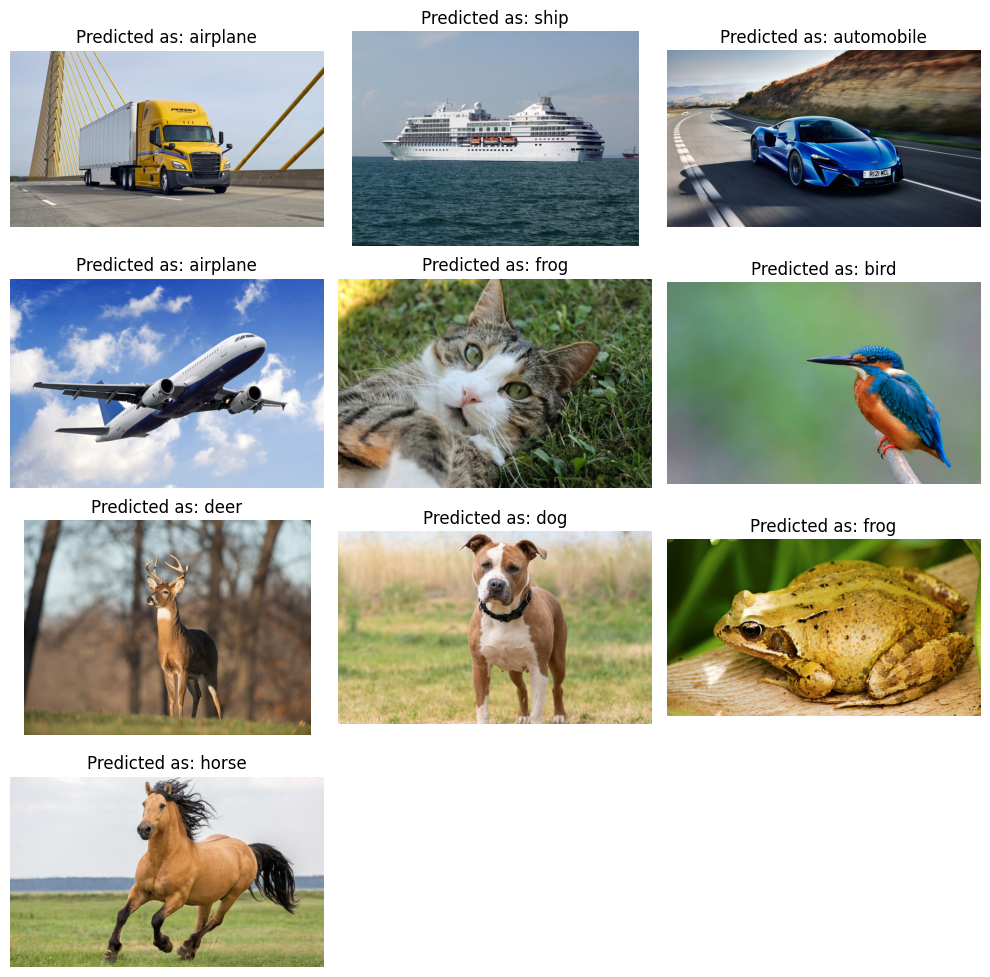

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Determine the number of rows and columns in the grid
num_images = len(urls)
num_cols = int(math.sqrt(num_images))
num_rows = math.ceil(num_images / num_cols)

# Preprocess images
images = []
for url in urls:
    path = tf.keras.utils.get_file(origin=url)
    img = keras.preprocessing.image.load_img(path)
    images.append(img)

# Create the grid plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axes = axes.flatten()

for i, img in enumerate(images):
    # Display high-resolution image
    axes[i].imshow(img)
    axes[i].axis('off')

    # Load and preprocess low-resolution image for prediction
    low_res_img = img.resize((32, 32))
    img_array = keras.preprocessing.image.img_to_array(low_res_img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = net4.predict(img_array)
    class_index = score=np.argmax(predictions[0])
    class_name = classes[class_index]

    axes[i].set_title("Predicted as: {}".format(class_name))

# Remove any empty subplots
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Transfer Learning

In this section, we utilize the Xception architecture to do Transfer Learning. Transfer learning refers to the process of leveraging pre-trained models, such as Xception, that have been trained on large-scale datasets.

In [ ]:
train_ds = train_ds.unbatch()
train_ds = train_ds.batch(128)

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3))

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
# freeze all layers
base_model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224)))(inputs)

x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x)
x = tf.keras.layers.GlobalMaxPooling2D()(x)

outputs = tf.keras.layers.Dense(num_classes, activation=('softmax'))(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

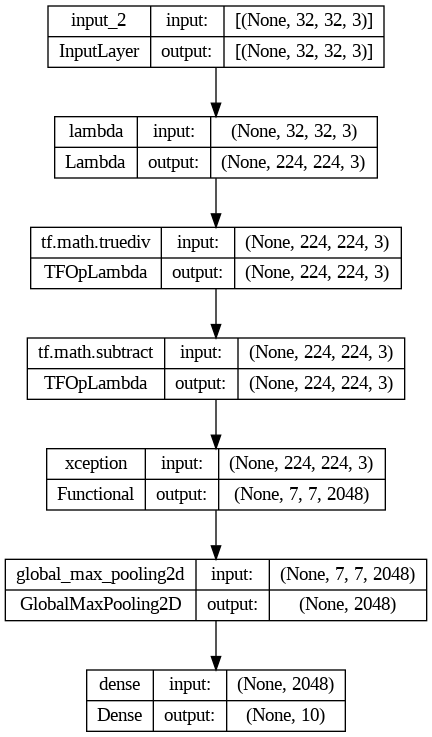

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 3
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/3
391/391 [==============================] - 250s 601ms/step - loss: 0.5455 - accuracy: 0.8189 - val_loss: 0.4450 - val_accuracy: 0.8539
Epoch 2/3
391/391 [==============================] - 232s 595ms/step - loss: 0.3881 - accuracy: 0.8693 - val_loss: 0.4182 - val_accuracy: 0.8615
Epoch 3/3
391/391 [==============================] - 235s 600ms/step - loss: 0.3484 - accuracy: 0.8822 - val_loss: 0.4104 - val_accuracy: 0.8648
